In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../data/" directory

import os
import os.path as osp

ds_folder = f'/mnt/data2/chaoyue/data/FDOH-DDT'
for dirname, _, filenames in os.walk(ds_folder):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_impute_0_before2015_node.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_impute_mean_before2015_node.csv
/mnt/data2/chaoyue/data/FDOH-DDT/test.csv
/mnt/data2/chaoyue/data/FDOH-DDT/test_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_0_node.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_mean_before2015_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/cluster_dynamics_FDOH_mono.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_mean_node.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_0_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_impute_mean_before2015_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_edges_metadata_mono_DDT.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_mean_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_impute_0_before2015_edge.csv
/mnt/data2/chaoyue/data/FDOH-DDT/FDOH_DDT_inpute_mean_before2015_node.csv


In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
#import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing
from collections import Counter
%matplotlib inline

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [3]:
#Import the files
node_df = pd.read_csv(f'{ds_folder}/cluster_dynamics_FDOH_mono.csv')
edge_df = pd.read_csv(f'{ds_folder}/FDOH_edges_metadata_mono_DDT.csv')
edge_df = pd.read_csv(f'FDOH_DDT_inpute_mean_edge.csv')

/home/chaoyue/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,10,13,14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/chaoyue/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,10,13,14,15,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
0,Background,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Background,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Background,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Background,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Background,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62108,Background,62109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62109,Background,62110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62110,Background,62111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62111,Background,62112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
edge_df

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred
0,31061,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155,0.015389,0.000155,0.232281,0.256531,0.232444,0.256531,NaN
1,31062,2,0.04610,45810.0,2017.0,HILLSBOROUGH CO.,F,1960.0,3.0,1.0,USA,2000.0,40.0,36to45,Heterosexual,Hispanic,Background,NaN,0.000461,0.046084,0.000461,2.622702,2.663988,2.622354,2.663988,NaN
2,31067,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032,0.003360,0.000032,-0.704117,-0.709608,-0.704186,-0.709608,NaN
3,31069,4,0.00055,39826.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000005,0.000550,0.000005,-0.922843,-0.923762,-0.922977,-0.923762,NaN
4,31069,5,0.00904,48640.0,2017.0,BROWARD CO.,M,1984.0,3.0,4.0,USA,2017.0,33.0,26to35,Heterosexual,Black,Background,NaN,0.000098,0.009040,0.000098,-0.261994,-0.192209,-0.261941,-0.192209,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62107,62046,62109,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038,0.003870,0.000038,-0.664419,-0.665491,-0.664477,-0.665491,NaN
62108,62109,62110,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061,0.005910,0.000061,-0.505628,-0.480336,-0.505641,-0.480336,NaN
62109,62109,62111,0.00513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000050,0.005130,0.000050,-0.566343,-0.570501,-0.566372,-0.570501,NaN
62110,31211,62112,0.00756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000077,0.007560,0.000077,-0.377195,-0.352535,-0.377172,-0.352535,NaN


In [9]:
Counter(edge_df[edge_df['ddt_pred'].isna()]['cluster_id'])

Counter({'Background': 60862})

edge_df = edge_df.drop(index=31058)
edge_df.reset_index()

In [10]:
edge_df = edge_df[~edge_df['genotype_yr'].isin([2016,2017])]

In [11]:
import networkx as nx
G = nx.from_pandas_edgelist(edge_df, source='from', target='to')

In [12]:
nodes = list(edge_df['from'].values)+list(edge_df['to'].values)
node_df = node_df[node_df['node'].isin(nodes)]

In [13]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
0,Background,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Background,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Background,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Background,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Background,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62108,Background,62109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62109,Background,62110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62110,Background,62111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62111,Background,62112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
edge_df

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred
0,31061,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155,0.015389,0.000155,0.232281,0.256531,0.232444,0.256531,NaN
2,31067,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032,0.003360,0.000032,-0.704117,-0.709608,-0.704186,-0.709608,NaN
3,31069,4,0.00055,39826.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000005,0.000550,0.000005,-0.922843,-0.923762,-0.922977,-0.923762,NaN
5,31070,6,0.01644,29025.0,2012.0,BROWARD CO.,M,1987.0,1.0,4.0,USA,2011.0,24.0,20to25,MSM,Black,Background,NaN,0.000150,0.016439,0.000150,0.314011,0.220151,0.314188,0.220151,NaN
6,31070,7,0.00639,39388.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000069,0.006390,0.000069,-0.468266,-0.415137,-0.468268,-0.415137,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62107,62046,62109,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038,0.003870,0.000038,-0.664419,-0.665491,-0.664477,-0.665491,NaN
62108,62109,62110,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061,0.005910,0.000061,-0.505628,-0.480336,-0.505641,-0.480336,NaN
62109,62109,62111,0.00513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000050,0.005130,0.000050,-0.566343,-0.570501,-0.566372,-0.570501,NaN
62110,31211,62112,0.00756,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000077,0.007560,0.000077,-0.377195,-0.352535,-0.377172,-0.352535,NaN


In [15]:
nodes_to_check = [i for i in nodes if G.degree[i] == 2]

In [16]:
edge_df = edge_df.reset_index()

In [17]:
delete_node = []
for node in nodes_to_check:
    delete_node.append(node)
    temp_df = edge_df[(edge_df['from'] == node) | (edge_df['to'] == node)]
    if len(temp_df) == 0:
        continue
    if len(temp_df) != 2:
        print(temp_df)
        break
    temp_nodes = list(set(list(temp_df['from'].values)+list(temp_df['to'].values))-{node})
    src = temp_df.index[0]
    dst = temp_df.index[1]
    idx = temp_df['index'].loc[src]
    edge_df['from'].loc[dst] = temp_nodes[1]
    edge_df['to'].loc[dst] = temp_nodes[0]
    edge_df['weight1'].loc[dst] += edge_df['weight1'].loc[src]
    edge_df['weight2'].loc[dst] += edge_df['weight2'].loc[src]
    cid = [edge_df['cluster_id'].loc[src],edge_df['cluster_id'].loc[dst]]
    ddt = [edge_df['ddt_pred'].loc[src],edge_df['ddt_pred'].loc[dst]]
    if cid[0] == 'Background':
        edge_df['cluster_id'].loc[dst] = cid[1]
        edge_df['ddt_pred'].loc[dst] = ddt[1]
    else:
        edge_df['cluster_id'].loc[dst] = cid[0]
        edge_df['ddt_pred'].loc[dst] = ddt[0]
    edge_df = edge_df.drop(src)
            

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [18]:
edge_df['cluster_id'].unique()

array(['Background', '421', '515', '914', '385', '1341', '1468', '1118',
       '88', '1319', '1058', '189', '1068', '967', '1219', '1208', '167',
       '1323', '1102', '1655', '348', '313', '1314', '1704', '178', '693',
       '1093', '663', '23', '916', '1183', '311', '761', '1116', '1579',
       '1418', '1169', '1427', '1357', '256', '680', '931', '1125', '148',
       '818', '418', '16', '400', '569', '714', '1206', '1195', '1012',
       '847', '529', '1479', '1407', '1196', '1295', '1299', '1670',
       '992', '1071', '917', '657', '507', '706', '1303', '1450', '453',
       '769', '719', '1032', '1583', '65', '861', '1081', '1360', '467',
       '645', '1388', '1242', '752', '1273', '1365', '1046', '1228',
       '1527', '1654', '1384', '329', '316', '278', '575', '1085', '1091',
       '462', '1309', '1234', '1661', '1593', '995', '786', '1517', '955',
       '70', '523', '1248', '436', '78', '1045', '576', '1037', '911',
       '201', '848', '103', '868', '541', '1114', '84

In [19]:
temp_df

,index,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred


In [20]:
node_df = node_df[~node_df['node'].isin(delete_node)]

In [21]:
edge_df

,index,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred
0,0,31061,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155,0.015389,0.000155,0.232281,0.256531,0.232444,0.256531,NaN
1,2,31067,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032,0.003360,0.000032,-0.704117,-0.709608,-0.704186,-0.709608,NaN
3,5,31070,6,0.01644,29025.0,2012.0,BROWARD CO.,M,1987.0,1.0,4.0,USA,2011.0,24.0,20to25,MSM,Black,Background,NaN,0.000150,0.016439,0.000150,0.314011,0.220151,0.314188,0.220151,NaN
4,6,31070,7,0.00639,39388.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000069,0.006390,0.000069,-0.468266,-0.415137,-0.468268,-0.415137,NaN
5,7,31072,8,0.00447,23286.0,2009.0,BROWARD CO.,M,1977.0,1.0,4.0,USA,2009.0,32.0,26to35,MSM,Black,421,6.0,0.000049,0.004470,0.000049,-0.617716,-0.579320,-0.617760,-0.579320,static
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51346,62106,31050,62105,0.02771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000302,0.007430,0.000079,-0.387314,-0.336813,-0.387294,-0.336813,NaN
51347,62107,62046,62109,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038,0.003870,0.000038,-0.664419,-0.665491,-0.664477,-0.665491,NaN
51348,62108,62109,62110,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061,0.005910,0.000061,-0.505628,-0.480336,-0.505641,-0.480336,NaN
51349,62109,31055,62109,0.03832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000349,0.005130,0.000050,-0.566343,-0.570501,-0.566372,-0.570501,NaN


In [22]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
0,Background,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Background,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Background,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Background,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Background,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62104,Background,62105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62105,Background,62106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62106,Background,62107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62108,Background,62109,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
map_dict = {}
nid = 0
for i in edge_df.index:
    src = edge_df['from'].loc[i]
    if src not in map_dict.keys():
        map_dict[src] = nid
        nid += 1
    dst = edge_df['to'].loc[i]
    if dst not in map_dict.keys():
        map_dict[dst] = nid
        nid += 1

In [24]:
edge_df['from']

0        31061
1        31067
3        31070
4        31070
5        31072
         ...  
51346    31050
51347    62046
51348    62109
51349    31055
51351    31211
Name: from, Length: 43498, dtype: int64

In [25]:
edge_df['from'] = edge_df['from'].map(map_dict)
edge_df['to'] = edge_df['to'].map(map_dict)

In [26]:
node_df = node_df[node_df['node'].isin(map_dict.keys())]
node_df['node'] = node_df['node'].map(map_dict)

In [27]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
0,Background,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Background,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Background,28519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Background,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Background,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62104,Background,43492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62105,Background,28510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62106,Background,43493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62108,Background,43495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
edge_df

,index,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred
0,0,0,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155,0.015389,0.000155,0.232281,0.256531,0.232444,0.256531,NaN
1,2,2,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032,0.003360,0.000032,-0.704117,-0.709608,-0.704186,-0.709608,NaN
3,5,4,5,0.01644,29025.0,2012.0,BROWARD CO.,M,1987.0,1.0,4.0,USA,2011.0,24.0,20to25,MSM,Black,Background,NaN,0.000150,0.016439,0.000150,0.314011,0.220151,0.314188,0.220151,NaN
4,6,4,6,0.00639,39388.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000069,0.006390,0.000069,-0.468266,-0.415137,-0.468268,-0.415137,NaN
5,7,7,8,0.00447,23286.0,2009.0,BROWARD CO.,M,1977.0,1.0,4.0,USA,2009.0,32.0,26to35,MSM,Black,421,6.0,0.000049,0.004470,0.000049,-0.617716,-0.579320,-0.617760,-0.579320,static
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51346,62106,43494,43492,0.02771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000302,0.007430,0.000079,-0.387314,-0.336813,-0.387294,-0.336813,NaN
51347,62107,43466,43495,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038,0.003870,0.000038,-0.664419,-0.665491,-0.664477,-0.665491,NaN
51348,62108,43495,43496,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061,0.005910,0.000061,-0.505628,-0.480336,-0.505641,-0.480336,NaN
51349,62109,43497,43495,0.03832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000349,0.005130,0.000050,-0.566343,-0.570501,-0.566372,-0.570501,NaN


In [29]:
Counter(edge_df[edge_df['ddt_pred'].isna()]['cluster_id'])

Counter({'Background': 42767})

### Edge feature processing

In [30]:
edge_df.columns

Index(['index', 'from', 'to', 'weight1', 'label', 'genotype_yr', 'county_name',
       'birth_sex', 'dob_yr', 'expo_categ', 'race', 'birth_country_cd',
       'hiv_dx_yr', 'Age_dx', 'age_cat', 'expo', 'race_eth', 'cluster_id',
       'clustersize', 'weight2', 'weight1_arsinh', 'weight2_arsinh',
       'weight1-norm', 'weight2-norm', 'weight1_arsinh-norm',
       'weight2_arsinh-norm', 'ddt_pred'],
      dtype='object')

In [31]:
edge_df = edge_df[['index', 'from', 'to', 'weight1', 'label', 'genotype_yr', 'county_name',
       'birth_sex', 'dob_yr', 'expo_categ', 'race', 'birth_country_cd',
       'hiv_dx_yr', 'Age_dx', 'age_cat', 'expo', 'race_eth', 'cluster_id',
       'clustersize', 'weight2', 'ddt_pred']]

In [32]:
edge_df['ddt_pred_2017'] = edge_df['ddt_pred']

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [33]:
aly_edge_feat_cols = ['weight1', 'weight2']
aly_edge_df = edge_df[aly_edge_feat_cols]

In [34]:
aly_edge_df.describe()

,weight1,weight2
count,43498.000000,43498.000000
mean,0.013030,0.000128
std,0.013731,0.000136
min,0.000000,0.000000
25%,0.002400,0.000024
50%,0.007150,0.000070
75%,0.020660,0.000204
max,0.109130,0.001136


array([[<AxesSubplot:title={'center':'weight1'}>,
        <AxesSubplot:title={'center':'weight2'}>]], dtype=object)

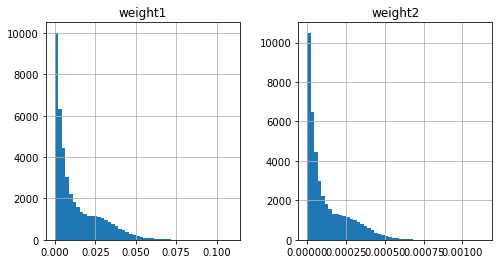

In [35]:
aly_edge_df.hist(bins=50,figsize=(8,4))

In [36]:
edge_df.loc[:, 'weight1_arsinh'] = np.arcsinh(edge_df['weight1'])
edge_df.loc[:, 'weight2_arsinh'] = np.arcsinh(edge_df['weight2'])

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


array([[<AxesSubplot:title={'center':'weight1'}>,
        <AxesSubplot:title={'center':'weight2'}>],
       [<AxesSubplot:title={'center':'weight1_arsinh'}>,
        <AxesSubplot:title={'center':'weight2_arsinh'}>]], dtype=object)

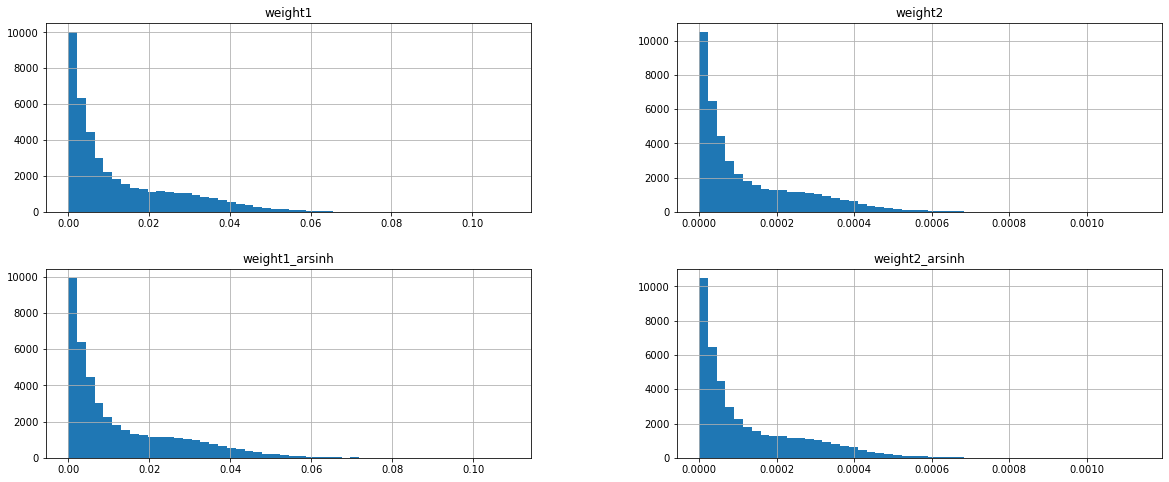

In [37]:
aly_edge_feat_cols += ['weight1_arsinh', 'weight2_arsinh']

edge_df[aly_edge_feat_cols].hist(bins=50,figsize=(20,8))

In [38]:
from sklearn import preprocessing

# Standardization edge features
std_scaler = preprocessing.StandardScaler().fit(edge_df[aly_edge_feat_cols])
norm_num_feat_cols = [f'{col_name}-norm' for col_name in aly_edge_feat_cols]

norm_train_vals = std_scaler.transform(edge_df[aly_edge_feat_cols])
norm_train_edge_df = pd.DataFrame(norm_train_vals, columns=norm_num_feat_cols, index=edge_df.index)
edge_df = pd.concat([edge_df, norm_train_edge_df], axis=1)

In [39]:
edge_df

,index,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,ddt_pred,ddt_pred_2017,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
0,0,0,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155,NaN,NaN,0.015389,0.000155,0.171870,0.194270,0.172041,0.194270
1,2,2,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032,NaN,NaN,0.003360,0.000032,-0.704288,-0.709559,-0.704368,-0.709559
3,5,4,5,0.01644,29025.0,2012.0,BROWARD CO.,M,1987.0,1.0,4.0,USA,2011.0,24.0,20to25,MSM,Black,Background,NaN,0.000150,NaN,NaN,0.016439,0.000150,0.248342,0.160237,0.248530,0.160237
4,6,4,6,0.00639,39388.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000069,NaN,NaN,0.006390,0.000069,-0.483610,-0.434079,-0.483618,-0.434079
5,7,7,8,0.00447,23286.0,2009.0,BROWARD CO.,M,1977.0,1.0,4.0,USA,2009.0,32.0,26to35,MSM,Black,421,6.0,0.000049,static,static,0.004470,0.000049,-0.623445,-0.587673,-0.623499,-0.587673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51346,62106,43494,43492,0.02771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000302,NaN,NaN,0.027706,0.000302,1.069148,1.278919,1.069408,1.278919
51347,62107,43466,43495,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038,NaN,NaN,0.003870,0.000038,-0.667144,-0.668287,-0.667212,-0.668287
51348,62108,43495,43496,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061,NaN,NaN,0.005910,0.000061,-0.518568,-0.495073,-0.518588,-0.495073
51349,62109,43497,43495,0.03832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000349,NaN,NaN,0.038311,0.000349,1.841886,1.626790,1.841982,1.626790


array([[<AxesSubplot:title={'center':'weight1'}>,
        <AxesSubplot:title={'center':'weight2'}>],
       [<AxesSubplot:title={'center':'weight1_arsinh'}>,
        <AxesSubplot:title={'center':'weight2_arsinh'}>],
       [<AxesSubplot:title={'center':'weight1_arsinh-norm'}>,
        <AxesSubplot:title={'center':'weight2_arsinh-norm'}>]],
      dtype=object)

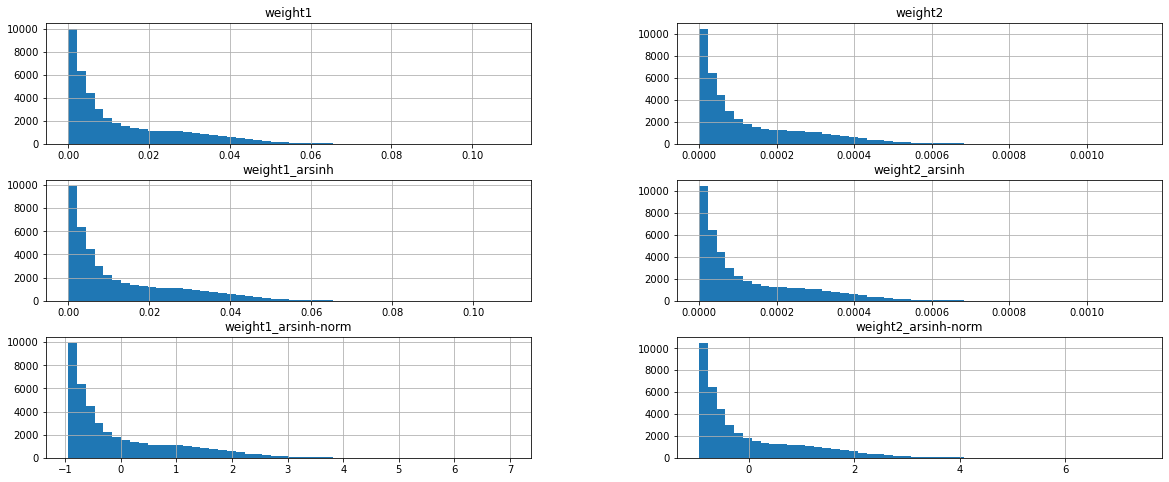

In [40]:
aly_edge_feat_cols += ['weight1_arsinh-norm', 'weight2_arsinh-norm']

edge_df[aly_edge_feat_cols].hist(bins=50,figsize=(20,8))

In [41]:
edge_df.to_csv(f'{ds_folder}/test_edge.csv', index=False)

### Process node data

In [42]:
prep_dict = np.load(f"../aly/prep-resp+TB_20230310.npy",allow_pickle=True)
prep_dict

array({'dynamic': {0: 'static', 1: 'decay', 2: 'growth', 3: 'bg'}, 'gamma_bins': array([-7.14782788e+04, -4.18408234e+00, -1.15355284e+00,  9.15811626e-01,
                   inf]), 'gamma_cat_dict': {Interval(0.916, inf, closed='right'): 0, Interval(-4.184, -1.154, closed='right'): 1, Interval(-1.154, 0.916, closed='right'): 2, Interval(-71478.28, -4.184, closed='right'): 3}, 'ltt_shape': {0: 'concave', 1: 'concave_convex', 2: 'convex', 3: 'convex_concave'}, 'gamma': {0: "(0.916, inf, 'right')", 1: "(-4.184, -1.154, 'right')", 2: "(-1.154, 0.916, 'right')", 3: "(-71478.28, -4.184, 'right')"}, 'r0': 1.8806286709062279, 'feat': ['v_sampling_fraction', 'v_cluster_size', 'v_timespan', 'oster', 'PD', 'abs_growth_rate', 'fraction_time_growth', 'r_max', 'cherries', 'BLD', 'new_R0'], 'mean': array([5.09553331e-01, 4.90240925e+02, 3.42845029e+01, 3.42964209e+01,
       7.64572099e+02, 1.97245406e+03, 4.38075371e-01, 2.02050822e+02,
       3.08608291e-01, 6.74725250e-01, 1.88062867e+00]), 'std'

### Split the nodes into background and non-background

In [43]:
background_df = node_df[node_df['cluster_id']=='Background']
background_df 

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
0,Background,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Background,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Background,28519,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Background,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Background,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
62104,Background,43492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62105,Background,28510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62106,Background,43493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62108,Background,43495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
node_df = node_df[node_df['cluster_id']!='Background']
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
8,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
9,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
10,421,13,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
11,421,28521,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
30151,950,43036,NaN,1.802080,47.353344,4.363486e+285,0.197479,1.038510e+288,concave_convex,0.09730,0.315789
30213,1151,43067,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000
30216,1151,27818,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000
30217,1151,27819,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000


In [45]:
node_df.isnull().sum()

cluster_id                0
node                      0
v_timespan              731
gamma                     0
oster                     0
abs_growth_rate         218
fraction_time_growth    218
r_max                   218
ltt_shape                 0
PD                        0
cherries                  0
dtype: int64

### impute mean

In [46]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
8,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
9,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
10,421,13,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
11,421,28521,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
30151,950,43036,NaN,1.802080,47.353344,4.363486e+285,0.197479,1.038510e+288,concave_convex,0.09730,0.315789
30213,1151,43067,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000
30216,1151,27818,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000
30217,1151,27819,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000


In [47]:
i=5
for item in ['abs_growth_rate','fraction_time_growth','r_max']:
    node_df[item].iloc[node_df[item].isna()] = prep_dict.item()['mean'][i]
    i+=1

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [48]:
node_df.isnull().sum()

cluster_id                0
node                      0
v_timespan              731
gamma                     0
oster                     0
abs_growth_rate           0
fraction_time_growth      0
r_max                     0
ltt_shape                 0
PD                        0
cherries                  0
dtype: int64

In [49]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
8,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
9,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
10,421,13,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
11,421,28521,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333
...,...,...,...,...,...,...,...,...,...,...,...
30151,950,43036,NaN,1.802080,47.353344,4.363486e+285,0.197479,1.038510e+288,concave_convex,0.09730,0.315789
30213,1151,43067,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000
30216,1151,27818,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000
30217,1151,27819,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000


### Preprocessing-1: Gamma discretization
    * Quantile-based discretization function

In [50]:
gamma_bins = prep_dict.item()['gamma_bins']
gamma_cat_dict = prep_dict.item()['gamma_cat_dict']

In [51]:
gamma_cat_dict

{Interval(0.916, inf, closed='right'): 0,
 Interval(-4.184, -1.154, closed='right'): 1,
 Interval(-1.154, 0.916, closed='right'): 2,
 Interval(-71478.28, -4.184, closed='right'): 3}

In [52]:
for interval in gamma_cat_dict.keys():
    final = interval
final

Interval(-71478.28, -4.184, closed='right')

In [53]:
gamma_bins

array([-7.14782788e+04, -4.18408234e+00, -1.15355284e+00,  9.15811626e-01,
                   inf])

In [54]:
gamma_cats = []
for i in range(len(node_df)):
    for interval in gamma_cat_dict.keys():
        if node_df['gamma'].iloc[i] in interval:
            gamma_cats.append(gamma_cat_dict[interval])
            break
        elif node_df['gamma'].iloc[i] <= gamma_bins[0]:
            gamma_cats.append(gamma_cat_dict[final])
            break

In [55]:
set(gamma_cats)

{0, 1, 2, 3}

In [56]:
node_df['gamma_cat'] = gamma_cats
print(f'Gamma cat: {node_df["gamma_cat"].unique()}')
node_df

Gamma cat: [1 2 3 0]


/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1
8,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1
9,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1
10,421,13,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1
11,421,28521,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1
...,...,...,...,...,...,...,...,...,...,...,...,...
30151,950,43036,NaN,1.802080,47.353344,4.363486e+285,0.197479,1.038510e+288,concave_convex,0.09730,0.315789,0
30213,1151,43067,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1
30216,1151,27818,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1
30217,1151,27819,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1


In [57]:
ltt_dict = prep_dict.item()['ltt_shape']
rltt_dict = {}
for i in range(4):
    rltt_dict[ltt_dict[i]] = i
rltt_dict

{'concave': 0, 'concave_convex': 1, 'convex': 2, 'convex_concave': 3}

In [58]:
node_df["ltt_shape_cat"] = node_df["ltt_shape"].map(rltt_dict)

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [59]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1
8,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1
9,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1
10,421,13,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1
11,421,28521,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
30151,950,43036,NaN,1.802080,47.353344,4.363486e+285,0.197479,1.038510e+288,concave_convex,0.09730,0.315789,0,1
30213,1151,43067,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1,1
30216,1151,27818,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1,1
30217,1151,27819,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1,1


### Impute BLD and R0

In [60]:
#R_max
node_df['new_R0'] = prep_dict.item()['mean'][10]
#BLD
node_df['BLD'] = prep_dict.item()['mean'][9]

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [61]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725
8,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725
9,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725
10,421,13,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725
11,421,28521,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30151,950,43036,NaN,1.802080,47.353344,4.363486e+285,0.197479,1.038510e+288,concave_convex,0.09730,0.315789,0,1,1.880629,0.674725
30213,1151,43067,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1,1,1.880629,0.674725
30216,1151,27818,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1,1,1.880629,0.674725
30217,1151,27819,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1,1,1.880629,0.674725


In [62]:
num_feat_cols = ["oster", "PD",
                 "abs_growth_rate", "fraction_time_growth", "r_max","cherries","BLD","new_R0"]
#aly_col = num_feat_cols + cat_feat_cols
aly_col = num_feat_cols
print(aly_col)

aly_df = node_df[aly_col]

['oster', 'PD', 'abs_growth_rate', 'fraction_time_growth', 'r_max', 'cherries', 'BLD', 'new_R0']


### Processing-1. One-hot encoding for the categorical feature
* ltt_shape_cat
* gamma_cat

In [63]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder

cat_feat_cols = ['ltt_shape_cat','gamma_cat']
print(cat_feat_cols)
cat_onehot_feat = []
org_idx = node_df.index

for cat_feat in cat_feat_cols:
    enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
    x = enc.fit_transform(node_df[cat_feat].values.reshape(-1, 1))
    n_dims = x.shape[-1]
    columns = [f'{cat_feat}_{i}' for i in range(n_dims)]
    cat_onehot_feat += columns
    cat_df = pd.DataFrame(x, index=org_idx, columns=columns)
    node_df = pd.concat([node_df, cat_df], axis=1)


['ltt_shape_cat', 'gamma_cat']


### Processing-3. Normalize the input features:
* Use Standardization
* Use MinMax normalization to normalize data to [0, 1]

In [64]:
node_df.describe()

,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3
count,731.000000,0.0,731.000000,731.000000,7.310000e+02,731.000000,7.310000e+02,731.000000,731.000000,731.000000,731.000000,7.310000e+02,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,18238.214774,NaN,-2.689152,45.610745,inf,0.402663,inf,0.052264,0.285199,1.488372,1.495212,1.880629e+00,6.747253e-01,0.084815,0.437756,0.374829,0.102599,0.242134,0.236662,0.311902,0.209302
std,11284.023327,NaN,24.127977,20.709555,NaN,0.234463,NaN,0.036938,0.081481,1.074391,0.790988,6.665899e-16,7.554686e-15,0.278797,0.496450,0.484410,0.303642,0.428668,0.425324,0.463587,0.407089
min,8.000000,NaN,-221.311395,15.425251,4.010943e-01,0.000000,-1.243549e+231,0.005660,0.125000,0.000000,0.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8687.000000,NaN,-2.283522,29.903992,1.972454e+03,0.229412,2.020508e+02,0.026590,0.214286,1.000000,1.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18660.000000,NaN,-0.918804,40.757537,5.446761e+183,0.438075,1.971826e+185,0.035750,0.272727,2.000000,1.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26457.000000,NaN,0.793333,56.085950,3.865916e+248,0.443182,7.422559e+250,0.069060,0.333333,2.000000,2.000000,1.880629e+00,6.747253e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,43067.000000,NaN,67.823984,150.266430,inf,1.000000,inf,0.165540,0.428571,3.000000,3.000000,1.880629e+00,6.747253e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### impute inf as max number 

In [65]:
node_df[node_df['abs_growth_rate']<np.inf]['abs_growth_rate'].max()

7.69804718114699e+307

In [66]:
for item in ['abs_growth_rate','r_max']:
    node_df[item].iloc[node_df[item]==np.inf] = node_df[node_df[item]<np.inf][item].max()

/home/chaoyue/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [67]:
node_df.describe()

,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3
count,731.000000,0.0,731.000000,731.000000,7.310000e+02,731.000000,7.310000e+02,731.000000,731.000000,731.000000,731.000000,7.310000e+02,7.310000e+02,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,18238.214774,NaN,-2.689152,45.610745,inf,0.402663,inf,0.052264,0.285199,1.488372,1.495212,1.880629e+00,6.747253e-01,0.084815,0.437756,0.374829,0.102599,0.242134,0.236662,0.311902,0.209302
std,11284.023327,NaN,24.127977,20.709555,inf,0.234463,inf,0.036938,0.081481,1.074391,0.790988,6.665899e-16,7.554686e-15,0.278797,0.496450,0.484410,0.303642,0.428668,0.425324,0.463587,0.407089
min,8.000000,NaN,-221.311395,15.425251,4.010943e-01,0.000000,-1.243549e+231,0.005660,0.125000,0.000000,0.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8687.000000,NaN,-2.283522,29.903992,1.972454e+03,0.229412,2.020508e+02,0.026590,0.214286,1.000000,1.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,18660.000000,NaN,-0.918804,40.757537,5.446761e+183,0.438075,1.971826e+185,0.035750,0.272727,2.000000,1.000000,1.880629e+00,6.747253e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,26457.000000,NaN,0.793333,56.085950,3.865916e+248,0.443182,7.422559e+250,0.069060,0.333333,2.000000,2.000000,1.880629e+00,6.747253e-01,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,43067.000000,NaN,67.823984,150.266430,7.698047e+307,1.000000,7.154401e+306,0.165540,0.428571,3.000000,3.000000,1.880629e+00,6.747253e-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<AxesSubplot:title={'center':'oster'}>,
        <AxesSubplot:title={'center':'PD'}>,
        <AxesSubplot:title={'center':'abs_growth_rate'}>],
       [<AxesSubplot:title={'center':'fraction_time_growth'}>,
        <AxesSubplot:title={'center':'r_max'}>,
        <AxesSubplot:title={'center':'cherries'}>],
       [<AxesSubplot:title={'center':'BLD'}>,
        <AxesSubplot:title={'center':'new_R0'}>, <AxesSubplot:>]],
      dtype=object)

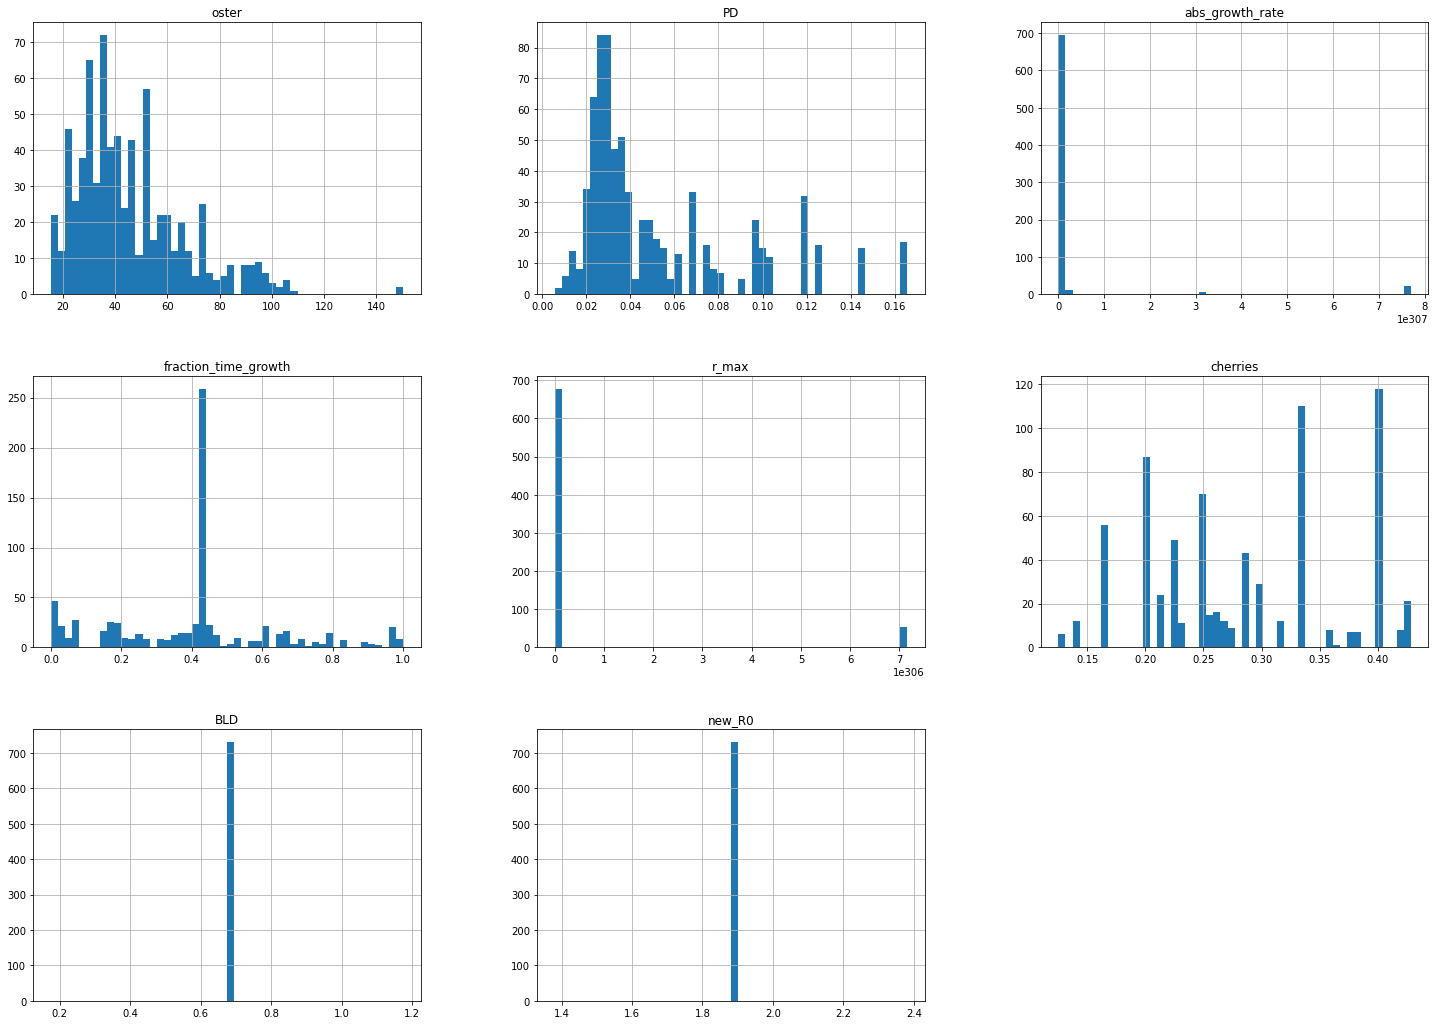

In [68]:
node_df[num_feat_cols].hist(bins=50,figsize=(25, 18))

In [69]:
num_feat_cols

['oster',
 'PD',
 'abs_growth_rate',
 'fraction_time_growth',
 'r_max',
 'cherries',
 'BLD',
 'new_R0']

In [70]:
cat_feat_cols

['ltt_shape_cat', 'gamma_cat']

In [71]:
feat_cols = num_feat_cols+cat_feat_cols
feat_cols

['oster',
 'PD',
 'abs_growth_rate',
 'fraction_time_growth',
 'r_max',
 'cherries',
 'BLD',
 'new_R0',
 'ltt_shape_cat',
 'gamma_cat']

In [72]:
node_df[num_feat_cols]

,oster,PD,abs_growth_rate,fraction_time_growth,r_max,cherries,BLD,new_R0
7,52.408025,0.03607,2.832775e+275,0.151724,4.107524e+277,0.333333,0.674725,1.880629
8,52.408025,0.03607,2.832775e+275,0.151724,4.107524e+277,0.333333,0.674725,1.880629
9,52.408025,0.03607,2.832775e+275,0.151724,4.107524e+277,0.333333,0.674725,1.880629
10,52.408025,0.03607,2.832775e+275,0.151724,4.107524e+277,0.333333,0.674725,1.880629
11,52.408025,0.03607,2.832775e+275,0.151724,4.107524e+277,0.333333,0.674725,1.880629
...,...,...,...,...,...,...,...,...
30151,47.353344,0.09730,4.363486e+285,0.197479,1.038510e+288,0.315789,0.674725,1.880629
30213,90.099510,0.02724,2.645864e+234,0.780000,2.645864e+236,0.400000,0.674725,1.880629
30216,90.099510,0.02724,2.645864e+234,0.780000,2.645864e+236,0.400000,0.674725,1.880629
30217,90.099510,0.02724,2.645864e+234,0.780000,2.645864e+236,0.400000,0.674725,1.880629


In [73]:
std_scaler = preprocessing.StandardScaler().fit(node_df[num_feat_cols])
std_scaler.mean_ = prep_dict.item()['mean'][3:]
std_scaler.scale_ = prep_dict.item()['std'][3:]

/home/chaoyue/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/chaoyue/anaconda3/lib/python3.8/site-packages/sklearn/utils/extmath.py:1006: RuntimeWarning: invalid value encountered in subtract
  new_unnormalized_variance -= correction**2 / new_sample_count


In [74]:
# Standardization non-category features
norm_num_feat_cols = [f'{col_name}-norm' for col_name in num_feat_cols]
norm_vals = std_scaler.transform(node_df[num_feat_cols])
norm_node_df = pd.DataFrame(norm_vals, columns=norm_num_feat_cols, index=node_df.index)
node_df = pd.concat([node_df, norm_node_df], axis=1)

/home/chaoyue/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


array([[<AxesSubplot:title={'center':'oster-norm'}>,
        <AxesSubplot:title={'center':'PD-norm'}>,
        <AxesSubplot:title={'center':'abs_growth_rate-norm'}>],
       [<AxesSubplot:title={'center':'fraction_time_growth-norm'}>,
        <AxesSubplot:title={'center':'r_max-norm'}>,
        <AxesSubplot:title={'center':'cherries-norm'}>],
       [<AxesSubplot:title={'center':'BLD-norm'}>,
        <AxesSubplot:title={'center':'new_R0-norm'}>, <AxesSubplot:>]],
      dtype=object)

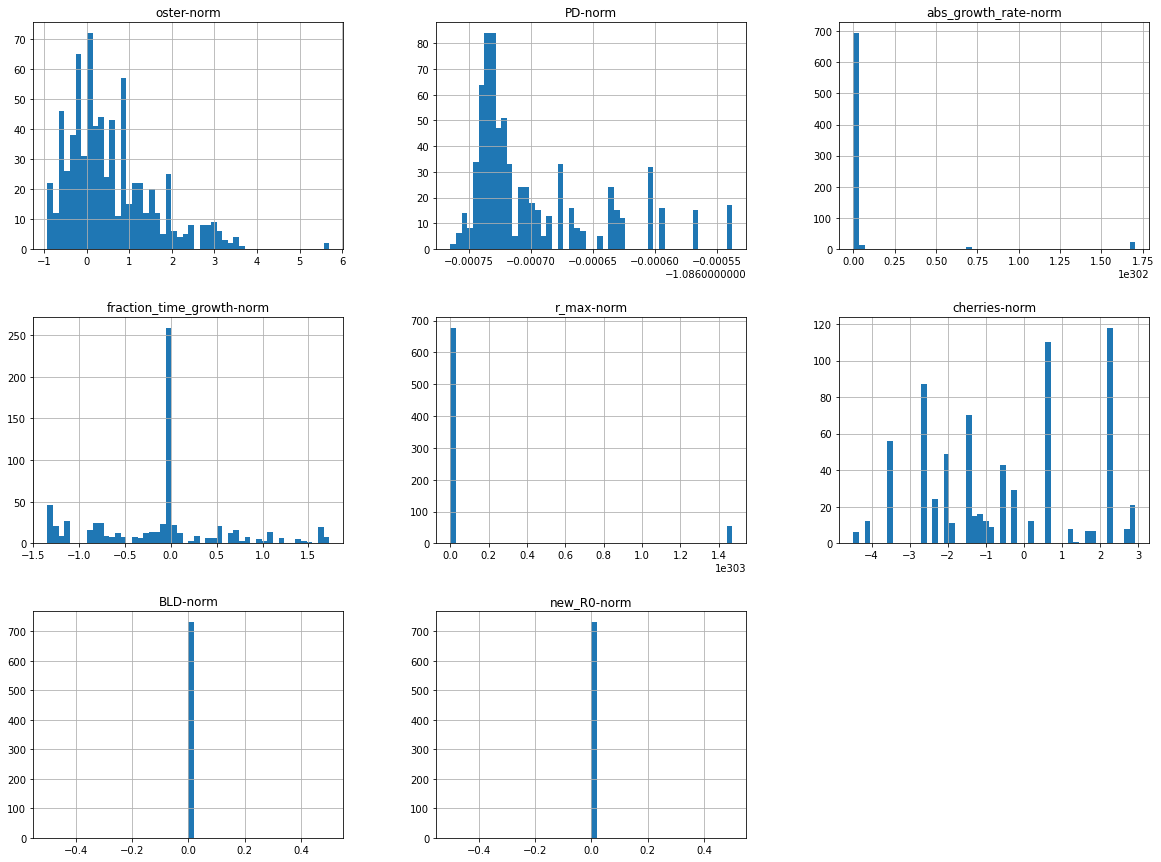

In [75]:
node_df[norm_num_feat_cols].hist(bins=50,figsize=(20,15))

In [76]:
node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.880450,8.441249e+273,0.603073,0.0,0.0
8,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.880450,8.441249e+273,0.603073,0.0,0.0
9,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.880450,8.441249e+273,0.603073,0.0,0.0
10,421,13,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.880450,8.441249e+273,0.603073,0.0,0.0
11,421,28521,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.880450,8.441249e+273,0.603073,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30151,950,43036,NaN,1.802080,47.353344,4.363486e+285,0.197479,1.038510e+288,concave_convex,0.09730,0.315789,0,1,1.880629,0.674725,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.641416,-1.086635,9.658930e+279,-0.739767,2.134210e+284,0.175158,0.0,0.0
30213,1151,43067,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.741302,-1.086734,5.856834e+228,1.051323,5.437435e+232,2.229153,0.0,0.0
30216,1151,27818,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.741302,-1.086734,5.856834e+228,1.051323,5.437435e+232,2.229153,0.0,0.0
30217,1151,27819,NaN,-1.866726,90.099510,2.645864e+234,0.780000,2.645864e+236,concave_convex,0.02724,0.400000,1,1,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.741302,-1.086734,5.856834e+228,1.051323,5.437435e+232,2.229153,0.0,0.0


### Merge the background and non-background nodes

In [77]:
full_df = pd.concat([node_df, background_df])
print(f'Train: {full_df.shape}')

Train: (43499, 31)


In [78]:
full_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
8,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
9,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
10,421,13,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
11,421,28521,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62104,Background,43492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62105,Background,28510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62106,Background,43493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62108,Background,43495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
full_df.to_csv(f'{ds_folder}/test.csv', index=False)

In [80]:
full_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
8,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
9,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
10,421,13,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
11,421,28521,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62104,Background,43492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62105,Background,28510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62106,Background,43493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62108,Background,43495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
edge_df

,index,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,ddt_pred,ddt_pred_2017,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
0,0,0,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155,NaN,NaN,0.015389,0.000155,0.171870,0.194270,0.172041,0.194270
1,2,2,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032,NaN,NaN,0.003360,0.000032,-0.704288,-0.709559,-0.704368,-0.709559
3,5,4,5,0.01644,29025.0,2012.0,BROWARD CO.,M,1987.0,1.0,4.0,USA,2011.0,24.0,20to25,MSM,Black,Background,NaN,0.000150,NaN,NaN,0.016439,0.000150,0.248342,0.160237,0.248530,0.160237
4,6,4,6,0.00639,39388.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000069,NaN,NaN,0.006390,0.000069,-0.483610,-0.434079,-0.483618,-0.434079
5,7,7,8,0.00447,23286.0,2009.0,BROWARD CO.,M,1977.0,1.0,4.0,USA,2009.0,32.0,26to35,MSM,Black,421,6.0,0.000049,static,static,0.004470,0.000049,-0.623445,-0.587673,-0.623499,-0.587673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51346,62106,43494,43492,0.02771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000302,NaN,NaN,0.027706,0.000302,1.069148,1.278919,1.069408,1.278919
51347,62107,43466,43495,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038,NaN,NaN,0.003870,0.000038,-0.667144,-0.668287,-0.667212,-0.668287
51348,62108,43495,43496,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061,NaN,NaN,0.005910,0.000061,-0.518568,-0.495073,-0.518588,-0.495073
51349,62109,43497,43495,0.03832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000349,NaN,NaN,0.038311,0.000349,1.841886,1.626790,1.841982,1.626790


In [82]:
import networkx as nx
import matplotlib.pyplot as plt
import dgl
import networkx as nx
import torch

Using backend: pytorch


In [83]:
src_ids = torch.tensor(edge_df['from'].values)
dst_ids = torch.tensor(edge_df['to'].values)

# Note: the start idx of the node is 0 not 1. But simulation node starts with 1
# We need substract 1 to the node idx for edges and nodes files.
#src_ids -= 1
#dst_ids -= 1

In [84]:
g = dgl.graph((src_ids, dst_ids))
nx_g = dgl.to_networkx(g)

print(f'Nodes: {g.number_of_nodes()}')
print(f'Edges: {g.number_of_edges()}')

Nodes: 43499
Edges: 43498


In [85]:
# -*- coding: utf-8 -*-
"""
Created on Fri Apr  2 15:11:58 2021

@author: Suncy
"""

import numpy as np # linear algebra
import dgl
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
#from dl import feat_dict


######################################## Network Model ############################################

# message passing user-defined functions
# could define different message passing strategy 

def edge_udf(edges):
    # cat states of edge and source node
    #cat_feat = torch.cat((edges.src['h_feat'],edges.data['h_feat']),1)
    cat_feat = torch.cat((edges.src['h_feat'],edges.data['h_feat'],edges.dst['h_feat']),1)
    return {'cat': cat_feat}
  

def node_udf(edges):
    # send edge state to dst node
    return {'h_feat': edges.data['h_feat']}


def reducer(nodes):
    # cat states of node and in-bound edge
    cat_feat = torch.cat((torch.sum(nodes.mailbox['h_feat'],1),nodes.data['h_feat']),1)
    #cat_feat = torch.cat((nodes.mailbox['h_feat'][:,0,:],nodes.data['h_feat']),1)
    return {'cat': cat_feat} 


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.h_feat = 64
        self.num_iter = 13
        n_feats = 16
        e_feats = 2
        num_classes = 4
        self.device = torch.device("cpu")
        
        # node LSTM & edge LSTM
        # 21 dim node feature & 2 dim edge feature
        self.Node_LSTM = nn.LSTMCell(n_feats, self.h_feat)
        self.Edge_LSTM = nn.LSTMCell(e_feats, self.h_feat)
        
        self.m = nn.LeakyReLU()
        
        # message passing network
        self.node_mpn = nn.Linear(2*self.h_feat, n_feats)
        self.edge_mpn = nn.Linear(3*self.h_feat, e_feats)

        # batch normalization on messages
        #self.node_bn = nn.BatchNorm1d(n_feats)
        #self.edge_bn = nn.BatchNorm1d(e_feats)

        # linear classifier
        self.fc = nn.Linear(self.h_feat, num_classes)
    
    def forward(self, g):
        info = dict()
        # num of nodes & edges in batched g
        num_nodes = g.ndata['feat'].shape[0]
        num_edges = g.edata['feat'].shape[0]
        
        # initialization of hidden state and cell state
        g.ndata['h_feat'] = torch.zeros(num_nodes, self.h_feat).to(self.device)
        g.ndata['c_feat'] = torch.zeros(num_nodes, self.h_feat).to(self.device)
        g.edata['h_feat'] = torch.zeros(num_edges, self.h_feat).to(self.device)
        g.edata['c_feat'] = torch.zeros(num_edges, self.h_feat).to(self.device)
        
        for i in range(self.num_iter):
            if i == 0: # first iteration, input is feature vec
                g.ndata['h_feat'], g.ndata['c_feat'] = self.Node_LSTM(g.ndata['feat'], (g.ndata['h_feat'], g.ndata['c_feat']))
                g.edata['h_feat'], g.edata['c_feat'] = self.Edge_LSTM(g.edata['feat'], (g.edata['h_feat'], g.edata['c_feat']))
            else: # later iteration, input is message
                g.ndata['h_feat'], g.ndata['c_feat'] = self.Node_LSTM(g.ndata['msg'], (g.ndata['h_feat'], g.ndata['c_feat']))
                g.edata['h_feat'], g.edata['c_feat'] = self.Edge_LSTM(g.edata['msg'], (g.edata['h_feat'], g.edata['c_feat']))
            
            
            # message passing
            g.apply_edges(edge_udf) # update the feature vector of edges
            #g.edata['msg'] = self.edge_bn(self.m(self.edge_mpn(g.edata['cat']))) # generate edge message
            g.edata['msg'] = self.m(self.edge_mpn(g.edata['cat'])) # generate edge message
            g.update_all(node_udf,reducer) # send edge state to dst nodes
            #g.ndata['msg'] = self.node_bn(self.m(self.node_mpn(g.ndata['cat']))) # generate node message
            g.ndata['msg'] = self.m(self.node_mpn(g.ndata['cat'])) # generate node message
      
        # linear classifier
        output = self.fc(g.ndata['h_feat'])
        
        #return output, g.ndata['h_feat'], info  # for embedding vectors
        
        return output, info
    
    def ce_loss(self, y_pred, y_true, weight=None):
        # print(y_pred.shape, y_true.shape, weight.shape)
        ce = F.cross_entropy(y_pred, y_true, weight=weight, size_average=None, reduce=None, reduction='mean')
        return {"loss": ce}


In [86]:
device = torch.device("cpu")

In [87]:
model = Net()
model.to(device)

Net(
  (Node_LSTM): LSTMCell(16, 64)
  (Edge_LSTM): LSTMCell(2, 64)
  (m): LeakyReLU(negative_slope=0.01)
  (node_mpn): Linear(in_features=128, out_features=16, bias=True)
  (edge_mpn): Linear(in_features=192, out_features=2, bias=True)
  (fc): Linear(in_features=64, out_features=4, bias=True)
)

In [88]:
# load weight of model
from collections import OrderedDict
restore_file = osp.join('../dl/nov_save/exp/pdglstm_0/weight/loss/model.pth.tar')
checkpoint = torch.load(restore_file)
d2 = OrderedDict([(k[7:], v) for k, v in checkpoint['state_dict'].items()])
model.load_state_dict(d2)

<All keys matched successfully>

In [89]:
norm_onehot_feats = [
        "oster-norm",
        "PD-norm",
        "abs_growth_rate-norm",
        "fraction_time_growth-norm",
        "r_max-norm",
        "cherries-norm",
        "BLD-norm",
        "new_R0-norm",
        "ltt_shape_cat_0",
        "ltt_shape_cat_1",
        "ltt_shape_cat_2",
        "ltt_shape_cat_3",
        "gamma_cat_0",
        "gamma_cat_1",
        "gamma_cat_2",
        "gamma_cat_3"
    ]

In [90]:
full_df.loc[full_df["cluster_id"] == 'Background', norm_onehot_feats] = 0
full_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
8,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
9,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
10,421,13,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
11,421,28521,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62104,Background,43492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62105,Background,28510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62106,Background,43493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62108,Background,43495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0


In [91]:
full_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm
7,421,8,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
8,421,10,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
9,421,11,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
10,421,13,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
11,421,28521,NaN,-2.195937,52.408025,2.832775e+275,0.151724,4.107524e+277,concave_convex,0.03607,0.333333,1.0,1.0,1.880629,0.674725,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.889725,-1.086722,6.270577e+269,-0.88045,8.441249e+273,0.603073,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62104,Background,43492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62105,Background,28510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62106,Background,43493,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0
62108,Background,43495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000e+00,0.00000,0.000000e+00,0.000000,0.0,0.0


In [92]:
src_ids = torch.tensor(edge_df['from'].values)
dst_ids = torch.tensor(edge_df['to'].values)
#src_ids -= 1
#dst_ids -= 1
g = dgl.graph((src_ids, dst_ids))  # create dgl
sorted_onetree_node_df = full_df.sort_values(by='node')
        
# assign features and labels for background nodes
node_feat = sorted_onetree_node_df[norm_onehot_feats].values
num_nodes = node_feat.shape[0]
num_feat = node_feat.shape[1]

# assign features for nodes and edges, assign labels
g.ndata["feat"] = torch.tensor(node_feat, dtype=torch.float32)
g.edata["feat"] = torch.tensor(edge_df[["weight1_arsinh-norm","weight2_arsinh-norm"]].values, dtype=torch.float32)
g = dgl.add_reverse_edges(g, copy_ndata=True, copy_edata=True)


In [93]:
model.eval()
pred = model(g)

In [94]:
pred

(tensor([[ 1.9677,  0.7858,  0.6646, -4.3091],
         [ 1.7930,  1.2751,  0.7441, -4.8117],
         [    nan,     nan,     nan,     nan],
         ...,
         [ 2.2052,  2.1159, -0.2161, -5.0059],
         [ 2.4594,  1.6489, -0.1511, -4.6098],
         [ 1.6151,  1.4610,  0.4101, -4.1637]], grad_fn=<AddmmBackward>),
 {})

In [95]:
pred[0].detach().numpy()[:,:-1]

array([[ 1.9677219 ,  0.7857751 ,  0.6646362 ],
       [ 1.7929884 ,  1.2750818 ,  0.744074  ],
       [        nan,         nan,         nan],
       ...,
       [ 2.2052195 ,  2.1159213 , -0.21613935],
       [ 2.459377  ,  1.648928  , -0.15113652],
       [ 1.6151304 ,  1.4610454 ,  0.4101019 ]], dtype=float32)

In [96]:
pred_label = np.argmax(pred[0].detach().numpy()[:,:-1],axis=1)

In [97]:
g.ndata["pred"] = torch.tensor(pred_label).to(device)

In [98]:
sorted_onetree_node_df['pred'] = pred_label

In [99]:
clu = sorted_onetree_node_df['cluster_id'].unique()

In [100]:
sorted_onetree_node_df

,cluster_id,node,v_timespan,gamma,oster,abs_growth_rate,fraction_time_growth,r_max,ltt_shape,PD,cherries,gamma_cat,ltt_shape_cat,new_R0,BLD,ltt_shape_cat_0,ltt_shape_cat_1,ltt_shape_cat_2,ltt_shape_cat_3,gamma_cat_0,gamma_cat_1,gamma_cat_2,gamma_cat_3,oster-norm,PD-norm,abs_growth_rate-norm,fraction_time_growth-norm,r_max-norm,cherries-norm,BLD-norm,new_R0-norm,pred
31060,Background,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,Background,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31066,Background,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Background,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31069,Background,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31049,Background,43494,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
62108,Background,43495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
62109,Background,43496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
31054,Background,43497,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [101]:
edge_df

,index,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,ddt_pred,ddt_pred_2017,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
0,0,0,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155,NaN,NaN,0.015389,0.000155,0.171870,0.194270,0.172041,0.194270
1,2,2,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032,NaN,NaN,0.003360,0.000032,-0.704288,-0.709559,-0.704368,-0.709559
3,5,4,5,0.01644,29025.0,2012.0,BROWARD CO.,M,1987.0,1.0,4.0,USA,2011.0,24.0,20to25,MSM,Black,Background,NaN,0.000150,NaN,NaN,0.016439,0.000150,0.248342,0.160237,0.248530,0.160237
4,6,4,6,0.00639,39388.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000069,NaN,NaN,0.006390,0.000069,-0.483610,-0.434079,-0.483618,-0.434079
5,7,7,8,0.00447,23286.0,2009.0,BROWARD CO.,M,1977.0,1.0,4.0,USA,2009.0,32.0,26to35,MSM,Black,421,6.0,0.000049,static,static,0.004470,0.000049,-0.623445,-0.587673,-0.623499,-0.587673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51346,62106,43494,43492,0.02771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000302,NaN,NaN,0.027706,0.000302,1.069148,1.278919,1.069408,1.278919
51347,62107,43466,43495,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038,NaN,NaN,0.003870,0.000038,-0.667144,-0.668287,-0.667212,-0.668287
51348,62108,43495,43496,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061,NaN,NaN,0.005910,0.000061,-0.518568,-0.495073,-0.518588,-0.495073
51349,62109,43497,43495,0.03832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000349,NaN,NaN,0.038311,0.000349,1.841886,1.626790,1.841982,1.626790


In [102]:
clu_labels = []
result = {}
m=0
static = 0
growth = 0
decay = 0
for c in clu:
    if c == 'Background':
        continue
    one_clu = sorted_onetree_node_df[sorted_onetree_node_df['cluster_id']==c]
    count = np.array([len(one_clu[one_clu['pred'] == 0]),
        len(one_clu[one_clu['pred'] == 1]),
        len(one_clu[one_clu['pred'] == 2])])
    if sum(count) == 1:
        m += 1
        continue
    print(count)
    static += count[0]
    decay += count[1]
    growth += count[2]
    if np.argmax(count) == 0:
        s = 'static'
    elif np.argmax(count) == 1:
        s = 'decay'
    elif np.argmax(count) == 2:
        s = 'growth'
    clu_labels.append(s)
    result[c] = s
    print(f"Cluster ID: {c}, dynamic: {s}")

[5 0 0]
Cluster ID: 421, dynamic: static
[6 0 0]
Cluster ID: 515, dynamic: static
[8 0 0]
Cluster ID: 914, dynamic: static
[6 0 0]
Cluster ID: 385, dynamic: static
[16  0  0]
Cluster ID: 1341, dynamic: static
[3 0 0]
Cluster ID: 1468, dynamic: static
[0 0 2]
Cluster ID: 1118, dynamic: growth
[6 0 0]
Cluster ID: 88, dynamic: static
[3 0 0]
Cluster ID: 1319, dynamic: static
[6 0 0]
Cluster ID: 1058, dynamic: static
[2 0 1]
Cluster ID: 189, dynamic: static
[15  0  0]
Cluster ID: 1068, dynamic: static
[4 0 0]
Cluster ID: 967, dynamic: static
[5 0 0]
Cluster ID: 1219, dynamic: static
[2 0 2]
Cluster ID: 1208, dynamic: static
[8 0 0]
Cluster ID: 167, dynamic: static
[5 0 0]
Cluster ID: 1323, dynamic: static
[6 0 0]
Cluster ID: 1102, dynamic: static
[2 0 0]
Cluster ID: 1655, dynamic: static
[5 0 0]
Cluster ID: 348, dynamic: static
[4 0 0]
Cluster ID: 313, dynamic: static
[4 0 0]
Cluster ID: 1314, dynamic: static
[2 0 0]
Cluster ID: 1704, dynamic: static
[3 0 2]
Cluster ID: 178, dynamic: stati

In [103]:
from collections import Counter
Counter(clu_labels)

Counter({'static': 111, 'growth': 24})

In [104]:
static

604

In [105]:
decay

1

In [106]:
growth

114

In [107]:
import pickle
with open('result.pkl', 'rb') as fp:
    result_2017 = pickle.load(fp)
len(result_2017)

157

In [108]:
122/157

0.7770700636942676

In [109]:
Counter(result_2017.values())

Counter({'static': 122, 'growth': 35})

In [110]:
a = 0
b = 0
for i in result.keys():
    if result[i] == result_2017[i]:
        a += 1
    else:
        b += 1
        print(i)
        print(result[i])
        print(result_2017[i])
a

1319
static
growth
189
static
growth
1208
static
growth
1655
static
growth
1357
growth
static
1195
static
growth
1228
static
growth
1371
static
growth
1307
static
growth
915
static
growth


125

In [111]:
b

10

In [112]:
edge_df[edge_df['ddt_pred_2017'].isna()]['cluster_id'].unique()

array(['Background'], dtype=object)

In [113]:
sorted_onetree_node_df['ddt_pred'] = np.nan
edge_df['ddt_pred'] = np.nan

In [114]:
for c in clu:
    if c == 'Background':
        continue
    one_clu = sorted_onetree_node_df[sorted_onetree_node_df['cluster_id']==c]
    count = np.array([len(one_clu[one_clu['pred'] == 0]),
        len(one_clu[one_clu['pred'] == 1]),
        len(one_clu[one_clu['pred'] == 2])])
    if np.argmax(count) == 0:
        s = 'static'
    elif np.argmax(count) == 1:
        s = 'decay'
    elif np.argmax(count) == 2:
        s = 'growth'
    sorted_onetree_node_df.loc[sorted_onetree_node_df['cluster_id']==c,'ddt_pred'] = s
    edge_df.loc[edge_df['cluster_id']==c,'ddt_pred'] = s

In [115]:
edge_df

,index,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,ddt_pred,ddt_pred_2017,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
0,0,0,1,0.01539,12759.0,2012.0,HILLSBOROUGH CO.,M,1949.0,6.0,6.0,USA,2001.0,52.0,46to55,MSM,White,Background,NaN,0.000155,NaN,NaN,0.015389,0.000155,0.171870,0.194270,0.172041,0.194270
1,2,2,3,0.00336,30593.0,2015.0,BROWARD CO.,M,1975.0,1.0,4.0,USA,2012.0,37.0,36to45,MSM,Black,Background,NaN,0.000032,NaN,NaN,0.003360,0.000032,-0.704288,-0.709559,-0.704368,-0.709559
3,5,4,5,0.01644,29025.0,2012.0,BROWARD CO.,M,1987.0,1.0,4.0,USA,2011.0,24.0,20to25,MSM,Black,Background,NaN,0.000150,NaN,NaN,0.016439,0.000150,0.248342,0.160237,0.248530,0.160237
4,6,4,6,0.00639,39388.0,2015.0,BROWARD CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,Background,NaN,0.000069,NaN,NaN,0.006390,0.000069,-0.483610,-0.434079,-0.483618,-0.434079
5,7,7,8,0.00447,23286.0,2009.0,BROWARD CO.,M,1977.0,1.0,4.0,USA,2009.0,32.0,26to35,MSM,Black,421,6.0,0.000049,static,static,0.004470,0.000049,-0.623445,-0.587673,-0.623499,-0.587673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51346,62106,43494,43492,0.02771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000302,NaN,NaN,0.027706,0.000302,1.069148,1.278919,1.069408,1.278919
51347,62107,43466,43495,0.00387,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000038,NaN,NaN,0.003870,0.000038,-0.667144,-0.668287,-0.667212,-0.668287
51348,62108,43495,43496,0.00591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000061,NaN,NaN,0.005910,0.000061,-0.518568,-0.495073,-0.518588,-0.495073
51349,62109,43497,43495,0.03832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Background,NaN,0.000349,NaN,NaN,0.038311,0.000349,1.841886,1.626790,1.841982,1.626790


In [116]:
temp_df = edge_df[~edge_df['ddt_pred'].isna()]

In [119]:
temp_df

,index,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,ddt_pred,ddt_pred_2017,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
5,7,7,8,0.00447,23286.0,2009.0,BROWARD CO.,M,1977.0,1.0,4.0,USA,2009.0,32.0,26to35,MSM,Black,421,6.0,0.000049,static,static,0.00447,0.000049,-0.623445,-0.587673,-0.623499,-0.587673
6,8,9,10,0.00222,26270.0,2010.0,BROWARD CO.,M,1968.0,3.0,4.0,DMA,2010.0,42.0,36to45,Heterosexual,Black,421,6.0,0.000020,static,static,0.00222,0.000020,-0.787315,-0.796857,-0.787423,-0.796857
7,9,9,11,0.00592,38386.0,2015.0,MIAMI-DADE CO.,M,1973.0,3.0,4.0,USA,2015.0,42.0,36to45,Heterosexual,Black,421,6.0,0.000063,static,static,0.00592,0.000063,-0.517840,-0.482034,-0.517859,-0.482034
8,10,12,13,0.00113,16317.0,2014.0,SEMINOLE CO.,M,1979.0,6.0,4.0,USA,2006.0,27.0,26to35,MSM,Black,421,6.0,0.000010,static,static,0.00113,0.000010,-0.866701,-0.870879,-0.866835,-0.870879
30,45,44,45,0.00267,23625.0,2009.0,PINELLAS CO.,F,1982.0,3.0,4.0,USA,2009.0,27.0,26to35,Heterosexual,Black,515,9.0,0.000025,static,static,0.00267,0.000025,-0.754541,-0.760989,-0.754638,-0.760989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50408,61168,43012,27731,0.00523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,915,NaN,0.000053,static,growth,0.00523,0.000053,-0.568094,-0.551849,-0.568129,-0.551849
50439,61199,43031,43030,0.00364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950,NaN,0.000034,static,static,0.00364,0.000034,-0.683895,-0.692476,-0.683968,-0.692476
50451,61211,43035,43034,0.00162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950,NaN,0.000016,static,static,0.00162,0.000016,-0.831014,-0.828182,-0.831136,-0.828182
50452,61212,43034,43036,0.00582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950,NaN,0.000058,static,static,0.00582,0.000058,-0.525123,-0.520152,-0.525145,-0.520152


In [118]:
temp_df[temp_df['ddt_pred']==temp_df['ddt_pred_2017']]

,index,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,ddt_pred,ddt_pred_2017,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
5,7,7,8,0.00447,23286.0,2009.0,BROWARD CO.,M,1977.0,1.0,4.0,USA,2009.0,32.0,26to35,MSM,Black,421,6.0,0.000049,static,static,0.00447,0.000049,-0.623445,-0.587673,-0.623499,-0.587673
6,8,9,10,0.00222,26270.0,2010.0,BROWARD CO.,M,1968.0,3.0,4.0,DMA,2010.0,42.0,36to45,Heterosexual,Black,421,6.0,0.000020,static,static,0.00222,0.000020,-0.787315,-0.796857,-0.787423,-0.796857
7,9,9,11,0.00592,38386.0,2015.0,MIAMI-DADE CO.,M,1973.0,3.0,4.0,USA,2015.0,42.0,36to45,Heterosexual,Black,421,6.0,0.000063,static,static,0.00592,0.000063,-0.517840,-0.482034,-0.517859,-0.482034
8,10,12,13,0.00113,16317.0,2014.0,SEMINOLE CO.,M,1979.0,6.0,4.0,USA,2006.0,27.0,26to35,MSM,Black,421,6.0,0.000010,static,static,0.00113,0.000010,-0.866701,-0.870879,-0.866835,-0.870879
30,45,44,45,0.00267,23625.0,2009.0,PINELLAS CO.,F,1982.0,3.0,4.0,USA,2009.0,27.0,26to35,Heterosexual,Black,515,9.0,0.000025,static,static,0.00267,0.000025,-0.754541,-0.760989,-0.754638,-0.760989
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49892,60652,42782,27239,0.00110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1247,NaN,0.000011,static,static,0.00110,0.000011,-0.868886,-0.866057,-0.869021,-0.866057
50439,61199,43031,43030,0.00364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950,NaN,0.000034,static,static,0.00364,0.000034,-0.683895,-0.692476,-0.683968,-0.692476
50451,61211,43035,43034,0.00162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950,NaN,0.000016,static,static,0.00162,0.000016,-0.831014,-0.828182,-0.831136,-0.828182
50452,61212,43034,43036,0.00582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,950,NaN,0.000058,static,static,0.00582,0.000058,-0.525123,-0.520152,-0.525145,-0.520152


In [120]:
diff = temp_df[temp_df['ddt_pred']!=temp_df['ddt_pred_2017']]
diff

,index,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,ddt_pred,ddt_pred_2017,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm
1011,1570,1437,1438,0.00055,33848.0,2014.0,ESCAMBIA CO.,M,1989.0,1.0,8.0,USA,2014.0,25.0,20to25,MSM,Other,1319,5.0,0.000006,static,growth,0.00055,0.000006,-0.908943,-0.900982,-0.909092,-0.900982
1012,1571,1439,1440,0.00313,39561.0,2015.0,DUVAL CO.,M,1995.0,1.0,4.0,USA,2015.0,20.0,20to25,MSM,Black,1319,5.0,0.000034,static,growth,0.00313,0.000034,-0.721039,-0.698609,-0.721124,-0.698609
1013,1572,1439,1441,0.00105,34419.0,2014.0,ESCAMBIA CO.,M,1993.0,1.0,4.0,USA,2014.0,21.0,20to25,MSM,Black,1319,5.0,0.000011,static,growth,0.00105,0.000011,-0.872527,-0.868023,-0.872664,-0.868023
1200,1855,1702,1703,0.00055,9683.0,2014.0,HIGHLANDS CO.,M,1958.0,1.0,6.0,USA,2007.0,49.0,46to55,MSM,White,189,5.0,0.000005,static,growth,0.00055,0.000005,-0.908943,-0.907355,-0.909092,-0.907355
1201,1856,1702,1704,0.01239,39485.0,2015.0,LEE CO.,M,1966.0,1.0,6.0,USA,2015.0,49.0,46to55,MSM,White,189,5.0,0.000115,static,growth,0.01239,0.000115,-0.046623,-0.095156,-0.046504,-0.095156
1462,2264,2075,2076,0.00756,31989.0,2015.0,DUVAL CO.,M,1993.0,1.0,4.0,USA,2013.0,20.0,20to25,MSM,Black,1208,5.0,0.000072,static,growth,0.00756,0.000072,-0.398397,-0.413710,-0.398379,-0.413710
1463,2265,2077,2078,0.00108,38138.0,2015.0,DUVAL CO.,M,1985.0,1.0,4.0,USA,2015.0,30.0,26to35,MSM,Black,1208,5.0,0.000010,static,growth,0.00108,0.000010,-0.870342,-0.875480,-0.870478,-0.875480
1464,2266,2077,2079,0.00104,40570.0,2015.0,DUVAL CO.,F,1976.0,3.0,4.0,USA,2015.0,39.0,36to45,Heterosexual,Black,1208,5.0,0.000010,static,growth,0.00104,0.000010,-0.873256,-0.873188,-0.873392,-0.873188
1823,2787,2602,2603,0.00081,41280.0,2015.0,MIAMI-DADE CO.,M,1980.0,1.0,1.0,CUB,2015.0,35.0,26to35,MSM,Hispanic,1655,6.0,0.000009,static,growth,0.00081,0.000009,-0.890007,-0.881328,-0.890149,-0.881328
6120,9273,8580,8581,0.00351,35188.0,2014.0,MANATEE CO.,F,1979.0,10.0,6.0,USA,2014.0,35.0,26to35,Unknown,White,1357,9.0,0.000032,growth,static,0.00351,0.000032,-0.693363,-0.710121,-0.693439,-0.710121


In [121]:
696/731

0.9521203830369357

In [126]:
8/731

0.01094391244870041

In [122]:
Counter(diff[diff['ddt_pred'] == 'static']['ddt_pred_2017'])

Counter({'growth': 27})

In [123]:
Counter(diff[diff['ddt_pred'] == 'growth']['ddt_pred_2017'])

Counter({'static': 7})

In [124]:
Counter(diff[diff['ddt_pred'] == 'decay']['ddt_pred_2017'])

Counter({'growth': 1})

In [99]:
edge_df.to_csv(f'{ds_folder}/FDOH_DDT_impute_mean_before2015_edge.csv', index=False)
sorted_onetree_node_df.to_csv(f'{ds_folder}/FDOH_DDT_impute_mean_before2015_node.csv', index=False)

In [92]:
df = pd.read_csv(f'{ds_folder}/FDOH_DDT_impute_0_before2015_edge.csv')

/home/chaoyue/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (5,6,10,13,14,15,25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [93]:
df[df['cluster_id']!='Background']['ddt_pred']

5        static
6        static
7        static
8        static
9        static
          ...  
19739    static
19778    static
19779    static
19780    static
19822    static
Name: ddt_pred, Length: 731, dtype: object

In [94]:
edge_df[edge_df['cluster_id']!='Background']['ddt_pred']

7        static
8        static
9        static
10       static
11       static
          ...  
30151    static
30213    static
30216    static
30217    static
30282    static
Name: ddt_pred, Length: 731, dtype: object

In [95]:
for c in clu:
    if edge_df[edge_df['cluster_id']==c]['ddt_pred'].unique()!=df[df['cluster_id']==c]['ddt_pred'].unique():
        print(c)

Background
714
1475
1307


In [96]:
edge_df[edge_df['cluster_id']=='714']

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred
14155,16623,16624,0.00055,27658.0,2011.0,MIAMI-DADE CO.,M,1989.0,1.0,4.0,HTI,2011.0,22.0,20to25,MSM,Black,714,6.0,0.000006,0.00055,0.000006,-0.866881,-0.858643,-0.867004,-0.858643,growth
14156,16625,16626,0.00115,27332.0,2011.0,MIAMI-DADE CO.,M,1969.0,4.0,6.0,USA,2011.0,42.0,36to45,IDU,White,714,6.0,0.000011,0.00115,0.000011,-0.817285,-0.817103,-0.817394,-0.817103,growth
14157,16627,16628,0.00950,37524.0,2014.0,MIAMI-DADE CO.,M,1992.0,1.0,4.0,USA,2014.0,22.0,20to25,MSM,Black,714,6.0,0.000091,0.00950,0.000091,-0.127071,-0.151575,-0.126996,-0.151575,growth
14158,16627,16629,0.01043,23561.0,2014.0,BROWARD CO.,M,1983.0,1.0,4.0,X98,2009.0,26.0,26to35,MSM,Black,714,6.0,0.000104,0.01043,0.000104,-0.050197,-0.043202,-0.050104,-0.043202,growth
14159,16630,16631,0.00055,28433.0,2011.0,BROWARD CO.,M,1966.0,6.0,4.0,USA,2011.0,45.0,36to45,MSM,Black,714,6.0,0.000005,0.00055,0.000005,-0.866881,-0.864103,-0.867004,-0.864103,growth
14160,16632,16633,0.00433,40631.0,2015.0,CHARLOTTE CO.,M,1974.0,10.0,6.0,USA,2015.0,41.0,36to45,Unknown,White,714,6.0,0.000045,0.00433,0.000045,-0.554425,-0.532492,-0.554461,-0.532492,growth


In [97]:
df[df['cluster_id']=='714']

,from,to,weight1,label,genotype_yr,county_name,birth_sex,dob_yr,expo_categ,race,birth_country_cd,hiv_dx_yr,Age_dx,age_cat,expo,race_eth,cluster_id,clustersize,weight2,weight1_arsinh,weight2_arsinh,weight1-norm,weight2-norm,weight1_arsinh-norm,weight2_arsinh-norm,ddt_pred
9340,16623,16624,0.00055,27658.0,2011.0,MIAMI-DADE CO.,M,1989.0,1.0,4.0,HTI,2011.0,22.0,20to25,MSM,Black,714,6.0,0.000006,0.00055,0.000006,-0.866881,-0.858643,-0.867004,-0.858643,static
9341,16625,16626,0.00115,27332.0,2011.0,MIAMI-DADE CO.,M,1969.0,4.0,6.0,USA,2011.0,42.0,36to45,IDU,White,714,6.0,0.000011,0.00115,0.000011,-0.817285,-0.817103,-0.817394,-0.817103,static
9342,16627,16628,0.00950,37524.0,2014.0,MIAMI-DADE CO.,M,1992.0,1.0,4.0,USA,2014.0,22.0,20to25,MSM,Black,714,6.0,0.000091,0.00950,0.000091,-0.127071,-0.151575,-0.126996,-0.151575,static
9343,16627,16629,0.01043,23561.0,2014.0,BROWARD CO.,M,1983.0,1.0,4.0,X98,2009.0,26.0,26to35,MSM,Black,714,6.0,0.000104,0.01043,0.000104,-0.050197,-0.043202,-0.050104,-0.043202,static
9344,16630,16631,0.00055,28433.0,2011.0,BROWARD CO.,M,1966.0,6.0,4.0,USA,2011.0,45.0,36to45,MSM,Black,714,6.0,0.000005,0.00055,0.000005,-0.866881,-0.864103,-0.867004,-0.864103,static
9345,16632,16633,0.00433,40631.0,2015.0,CHARLOTTE CO.,M,1974.0,10.0,6.0,USA,2015.0,41.0,36to45,Unknown,White,714,6.0,0.000045,0.00433,0.000045,-0.554425,-0.532492,-0.554461,-0.532492,static
